# <b>Twitter US Airline Sentimen Analysis
# **Project 3**
Pablo Aguirre Solana

## **Objective**

### <font color ='red'>**To implement a sentiment analysis to learn how customers feel about the serviece of major US. airlines and build a classification model that classifies the tweets into positive, neutral and negative**</font>

##### Low code version


# **Index** 

- [1.Dataset](#1.Dataset)
- [2.EDA](#2.EDA)
- [3.Cleaning_Data](#3.Cleaning_Data)
- [4.Data_Pre-processing](#4.Data_Pre-processing)
- [5.Model_Building](#5.Model_Building)


### **Importing the necessary libraries**

In [1]:
!pip install contractions

import re, string, unicodedata                          
import contractions                                    
from bs4 import BeautifulSoup                         

import numpy as np                                   
import pandas as pd                                    
import nltk                                             
import seaborn as sns                                  
import matplotlib.pyplot as plt                         

nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                     
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer           
from wordcloud import WordCloud,STOPWORDS                 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split         
from sklearn.ensemble import RandomForestClassifier     
from sklearn.model_selection import cross_val_score       
from sklearn.metrics import confusion_matrix            
from wordcloud import WordCloud                         
from sklearn.feature_extraction.text import TfidfVectorizer 
import nltk
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 12.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True


[Back to top](#Index)


##  **1.Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/UTexas McCombs/Project_3/Tweets.csv")

In [4]:
# Checking the shape of the dataset
data.shape

(14640, 15)

In [5]:
# Displaying the first few rows of the dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
#Check for missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

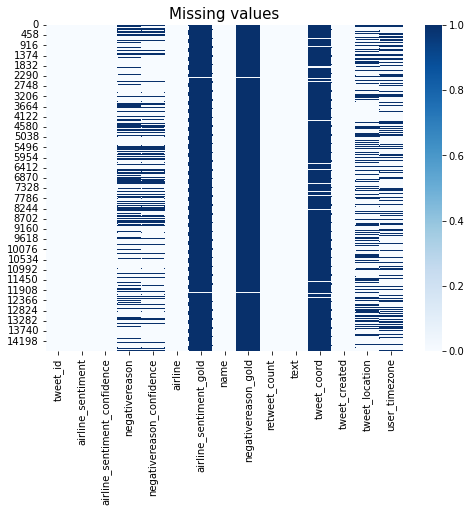

In [7]:
# Visualization of missing values using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cmap='Blues')                                 
plt.title("Missing values", fontsize = 15)
plt.show()

- Based on the above plot, we can see that many columns of our data set has a lot of missing values.

In [8]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

The columns that have a critical amount of missing values are:

- airline sentiment gold
- negative reason gold
- tweet coordinates
- negative reason
- negative reason confidence
- tweet location 
- user timezone



In [9]:
# Cheking for duplicates values 
data.duplicated().sum()

36

Since we have very few duplicate values, we can easily get rid of them.

In [10]:
# dropping the duplicates
data = data.drop_duplicates(keep = 'first')

# checking for duplicate values
data.duplicated().sum()

0


[Back to top](#Index)


##  **2.EDA**

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Percentage of tweets for each airline

---


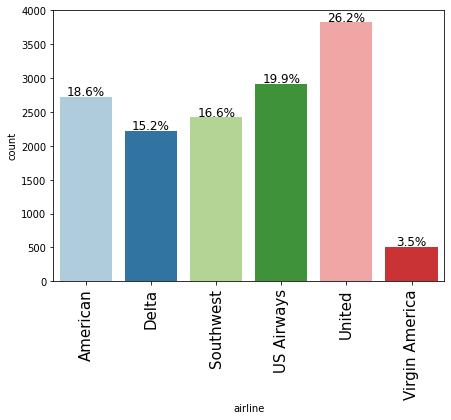

In [12]:
labeled_barplot(data, "airline", perc=True) 

#### Distribution of sentiments across all the tweets

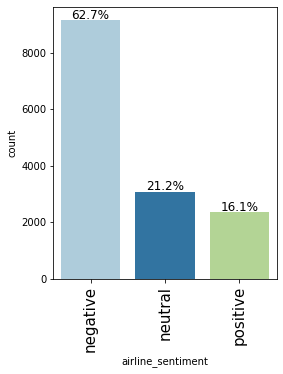

In [13]:
labeled_barplot(data, "airline_sentiment", perc=True)

#### Distribution of Sentiment of tweets for each airline

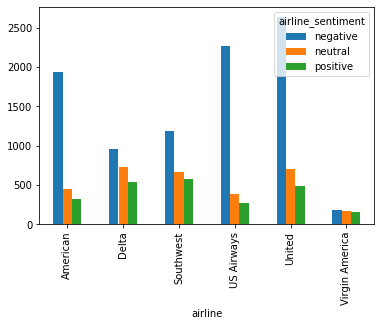

In [14]:
airline_sentiment =  data.groupby(["airline", "airline_sentiment"]).airline_sentiment.count().unstack()    
airline_sentiment.plot(kind='bar')

#### Plot of all the negative reasons

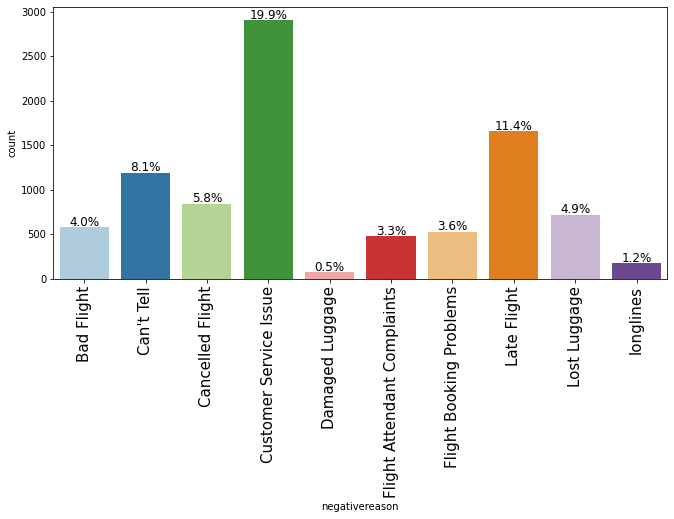

In [15]:
labeled_barplot(data, 'negativereason', perc = True)  

### Word Cloud for the negative Tweets

In [16]:
airline_tweets=data[data['airline_sentiment']=='negative']          
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS,                       
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

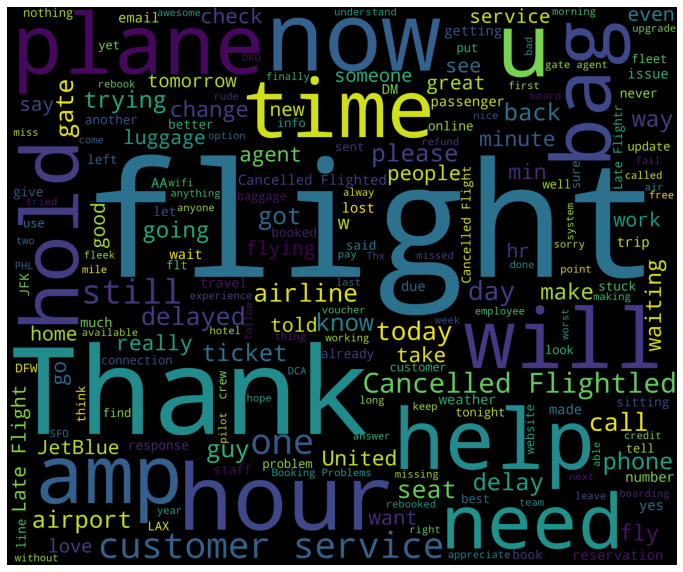

In [18]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)                                           
plt.axis('off')
plt.show()

- Help, hold, Cancelled, Cancelled Flightled, change amongts the most common negative words

### Wordcloud for positive reasons

In [19]:
airline_tweets=data[data['airline_sentiment']=='positive']                
words = ' '.join(data['text'])                                        
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,                       
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

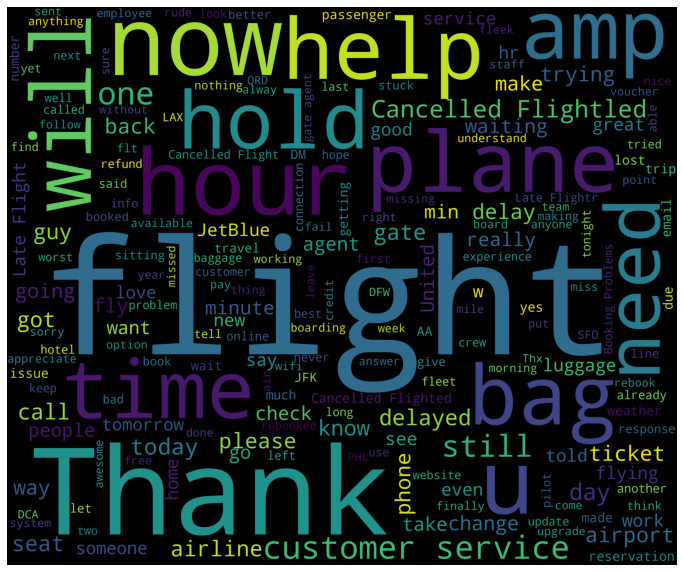

In [21]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)                                           
plt.axis('off')
plt.show()

- It is interesting how some of the negative most common words intersect with the positive ones. Among the positive most common words are: customer service, pelase, better, love.


[Back to top](#Index)


##  **3.Cleaning_Data**

In [22]:
# Take text and airline sentiment columns from the data
data = data[['text', 'airline_sentiment']]  

In [23]:
pd.set_option('display.max_colwidth', None)                             
data.head()   

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [24]:
# Display the unique values in airline sentiment column
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [25]:
# Display the values in airline sentiment column
data['airline_sentiment'].value_counts(normalize = True)

negative    0.627157
neutral     0.211654
positive    0.161189
Name: airline_sentiment, dtype: float64


[Back to top](#Index)


##  **4.Data_Pre-processing**

### Remove HTML Tags

In [26]:
# Code to remove the html tage
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                          
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))                        
data.head()                                                          

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#### Replace contractions in string

In [27]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))                  
data.head()     

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


#### Remove numbers

In [28]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)                                    
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))                  
data.head()  

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


#### Apply Tokenization

In [29]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 
data.head()    

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


#### Apply Stopwords

In [30]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


stopwords = list(set(stopwords) - set(customlist))  

In [31]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


- After pre-processing we end up with a cleaner text for modeling, because we removed the anomalies of the text, to analyze the text with more precision.


[Back to top](#Index)


##  **5.Model_Building**

## Build the model based on countvectorizer and Random forest

In [32]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=5000)                
data_features = Count_vec.fit_transform(data['text'])                

data_features = data_features.toarray()                       

In [33]:
data_features.shape

(14604, 5000)

#### Store Independent and Dependent variables

In [34]:
X = data_features
y = data['airline_sentiment']

#### Split the data into train and test

In [35]:
X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=.30, random_state=42)

#### Random Forest Model

In [36]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)            

forest = forest.fit(X_train, y_train)                        

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))          

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7151448623104835


- Our baseline Cross Validation Accuracy is of .71

#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [37]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [38]:
# K-Fold Cross - validation .
cv_scores = []                                                                             
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)                                                
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')          
    cv_scores.append(scores.mean())    

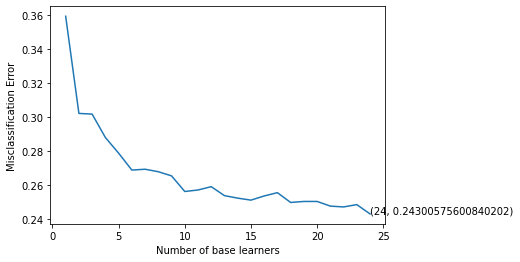

In [39]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 
optimal_learners = base_ln[error.index(min(error))]                
plt.plot(base_ln, error)                                           
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [40]:
# Train the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                    
clf.fit(X_train, y_train)                                               
clf.score(X_test, y_test) 

0.7704244637151986

 - After doing a K-Fold Cross Validation to get the optimal estimators that minimize the error, our classifier has a .77 level of accuracy, which is better than that of our baseline model.

In [41]:
# Predict the result for test data using the model built above.
result = clf.predict(X_test)    

In [42]:
# Print and plot Confusion matirx 

conf_mat = confusion_matrix(y_test, result)                      

print(conf_mat) 

[[2550  198   48]
 [ 376  421   88]
 [ 183  113  405]]


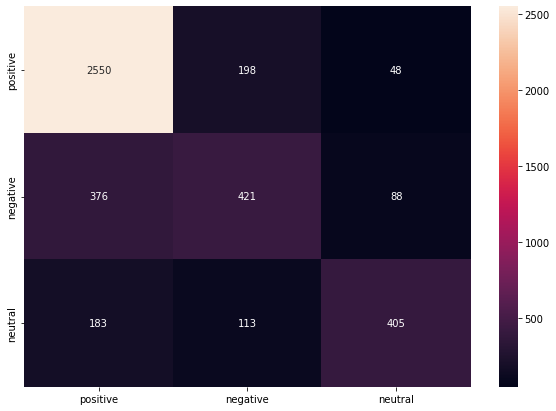

In [43]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- We can see that our classifier still has some degree of missclassification specially for predicting positive sentiment when the real lable is negative (373) and neutral (189).

**Wordcloud of top 20 important features from countvectorizer+Randomforest based mode**

In [44]:
all_features = Count_vec.get_feature_names()                     # Instantiate the feature from the vectorizer
top_features=''                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


thank,not,delay,great,jetblue,http,flight,usairways,unite,southwestair,love,hold,cancel,americanair,hours,get,hour,wait,call,bag,customer,virginamerica,time,awesome,amaze,dm,best,follow,would,help,good,please,go,worst,appreciate,service,need,fly,try,tell,
 
 


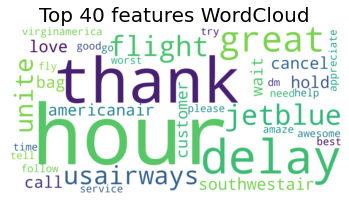

In [45]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Term Frequency(TF) - Inverse Document Frequency(IDF)

In [46]:
# Using TfidfVectorizer to convert text data to numbers.

tfidf_vect = TfidfVectorizer(max_features=5000)                         
data_features = tfidf_vect.fit_transform(data['text'])                  

data_features = data_features.toarray()  

In [47]:
data_features.shape

(14604, 5000)

#### Store Independent and Dependent variables

In [48]:
X = data_features
y = data['airline_sentiment']  

#### Split the data into train and test

In [49]:
X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=.30, random_state=42)

#### Random Forest Model

In [50]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)            

forest = forest.fit(X_train, y_train)                        

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))   

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7151434089992781


- Using the Tfid Vectorizers gives us almost the same Cross Validation Accuracy that our first baseline model with Count Vectorizers.

In [51]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [52]:
# K-Fold Cross - validation .
cv_scores = []                                                                             
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)                                                
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')          
    cv_scores.append(scores.mean())   

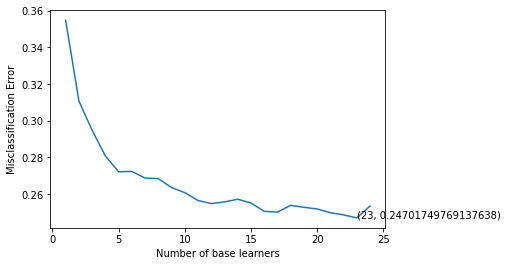

In [53]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 
optimal_learners = base_ln[error.index(min(error))]                
plt.plot(base_ln, error)                                           
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [54]:
# Train the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                    
clf.fit(X_train, y_train)                                               
clf.score(X_test, y_test) 

0.7660885440438157

 - After doing a K-Fold Cross Validation to get the optimal estimators that minimize the error, our classifier has a .76 level of accuracy, which is very similar to the one of the model with Count Vectorizers.

In [55]:
# Predict the result for test data using the model built above.
result = clf.predict(X_test)    

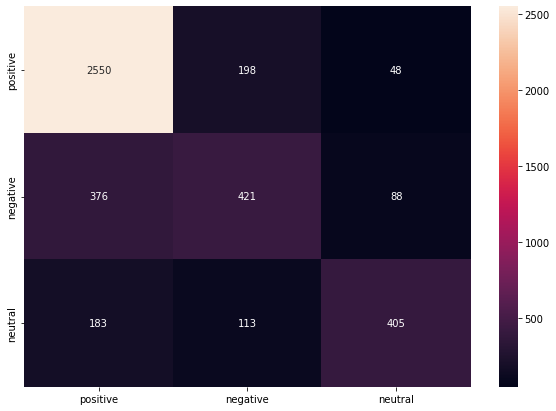

In [56]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- We can see that our classifier still has some degree of missclassification specially for predicting positive sentiment when the real lable is negative (376) and neutral (183). Pretty similar to the Coun Vectorizer model.

In [57]:
all_features = Count_vec.get_feature_names()                     # Instantiate the feature from the vectorizer
top_features=''                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


thank,not,southwestair,jetblue,unite,usairways,americanair,http,flight,great,virginamerica,love,delay,get,cancel,wait,hours,dm,call,hold,awesome,best,amaze,bag,good,time,much,fly,follow,service,help,appreciate,hour,please,would,customer,make,go,fleet,tomorrow,
 
 


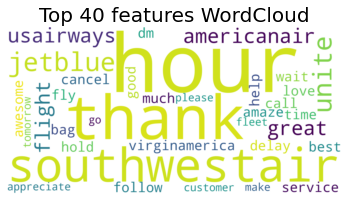

In [58]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Conclusions**:

After doing serval pre-processing techniques, such as removal of HTML, replace contractions, remove numbers, apply tokenization, stop-words and lemmatization, we built two models to classify the sentiment of the twitters. 

In the first model we used a Count-Vectorizer which help us count the nymber of times a word appears in a document (using a bag of words approach). The baseline accuracy for this model was .71, and after optimizing the parameters of the model we increased the model to .77.

In the second model we used a TD-IDF Vectorizer, which takes into account not only how many times a word appears in a document but also how important that word is in the whole corpus. The baseline accuracy for this model was .71, and after optimizing the parameters of the model we increased the model to .77.

Both models, yield the same predictive accuracy in the validation sample, which means that the Vectorizers used did not implied any significant change. Both models offer some room for improvement due to the fact that they have some degree of misclassification in predicting positive sentiment for airline twitters.